# <font color='pink'>By:Sarah Saeed  </font>

# <font color='blue'>What is a SVM?  </font>

**Support vector machines** are a set of supervised learning methods used for classification, regression, and outliers detection.

SVMs are different from other classification algorithms because of the way they choose the decision boundary that maximizes the distance from the nearest data points of all the classes. The decision boundary created by SVMs is called the **maximum margin classifier** or the maximum margin hyper plane.

SVMs are different from other classification algorithms because of the way they choose the decision boundary that maximizes the distance from the nearest data points of all the classes. The decision boundary created by SVMs is called the maximum margin classifier or the maximum margin hyper plane.

### didin't get it?  don't worry, here's a gentle explanation for the whole story behind svm
imagine that we measure the mass of a bunch of mice:

--> red dots represents mice that **not obese**

--> green dots represents mice that are **obese**

and we have a set of different scenerios here.


## scenario-1

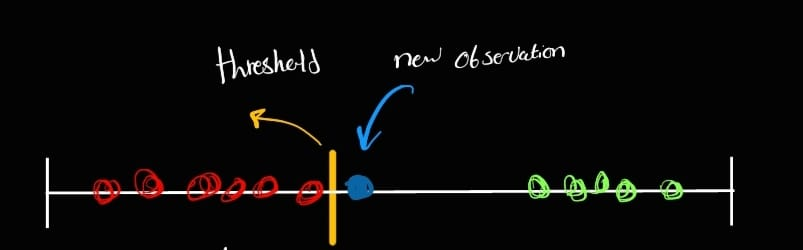


when we have a threshold that exactly seperate between the two classes, we might misclassify new observations, in this case, the new observation here will be classified as **obese**(misclassification), though it's more close to **not obese.**



##  scenario-2: maximal margin classifier

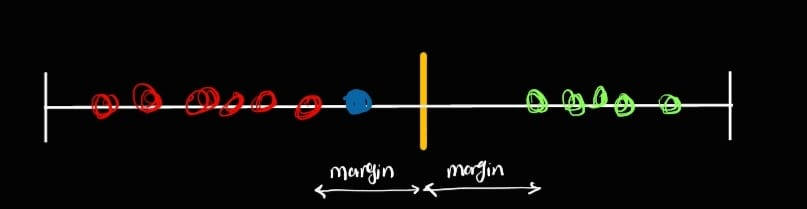

when we picked a threshold halfway between the two classes, the distances between the observations and the threshold are the same and both reflect **Margin**.

here the new observation is correctly classified as **not obese**.

moving the threshold to any side will increase the probability of misclassification, so when we use the threshold that gives the maximum distance betweeb nearest data points of each class, we say that we use **maximal margin classifier**.

Note that:
- the maximal margin classifier is very sensitive to outliers, which may lead to misclassification(see scenario-3).


##  scenario-3: Support vector classifier

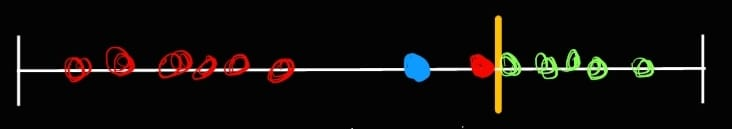
here, the maximum margin will misclassify the new observation as **not obese**, so the MMCs(maximal margin classifiers) are very sensitive to outliers and may lead to misclassification on the long run.




for that reason, we will make a threshold that is not sensitive to outliers by allowing misclassification.

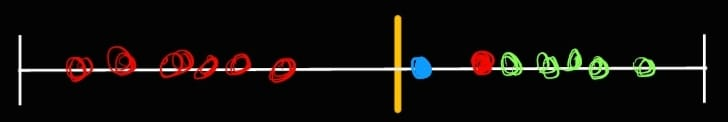


a new term called **Soft Margin** which is the distance between the observation and the threshold, that when we allow misclassification.
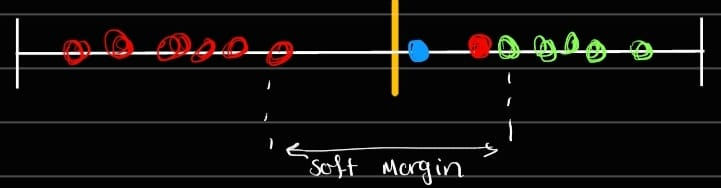

in the case of using soft margin to detect the threshold, we use **Support vector classifier** to classify obeservations.
Notes:
- we use cross validation to pick the best soft margin.
- observations on the edge and within the sofy margin are called **support vectors**.
- if two datapoints represented by two variables, the data will be represented in two dimention, also, 3 varibles means that data will be represented as a plane instead of a line, but what if we have more than 3-dimention? the answer is **the svc is hyperplane**

##  scenario-4: no obvious linear classifier

assume that tha x-axis represents a dosage of a drug, where:

red points represents **not cured patient**

green points represents **cured patient**

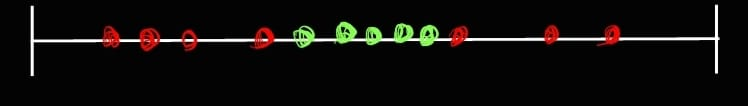



Since **maximal margin classifiers** and **support vector classifiers** can't handle this kind of data, NOW, it's time to know what a support vector machine is.

- assume y-axis represents the dosage^2
- if we assumed different values for dosage , the data will be represented as two dimentional :
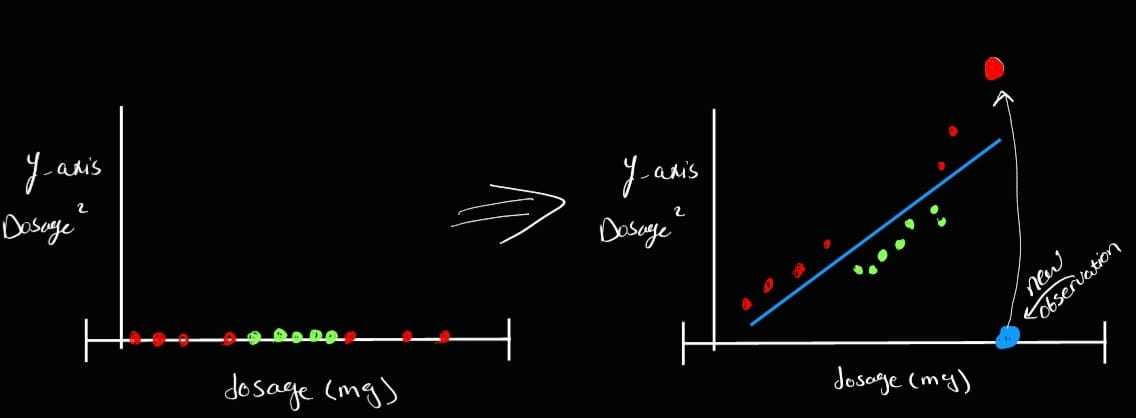

and then we can use support vector classifier to classify new observations

**So the steps are:**

1-start with data of low dimention(here, we started with the x-axis where each point has 0 dimention).

2-move the data to a higher dimention (here, data were moved to be represented in 2-dimentional space).

3- use support vector classifier to classify new observations.

**you might be wondering**, how to decide which equation to use for the y-axis??

in order to make mathematics possibe, SVM uses something called **kernel functions** to systematically find support vector classifiers in higher dimentions.

**NOW**, we will discuss two types of kernels: **polynomial kernel** and **radial kernel**(also known as **RBF** )


## 1-polynomial kernel

The polynomial kernel isn't used in practice very often because it isn't as computationally efficient as other kernels and its predictions aren't as accurate.

- the polynomial kernel computes the two dimention relation between each pair of observations.
- in other words, the polynomial kernel increase the dimention of our data points, and then compute the relation between each point in this dimention in order to find the SVC.
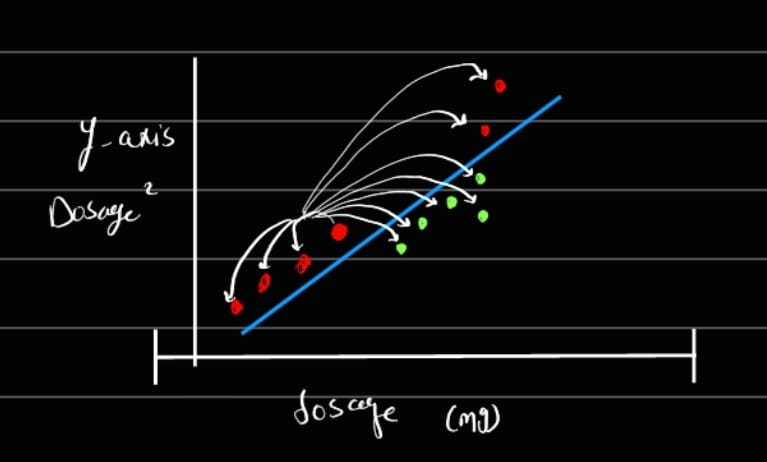

**and here's the equation**

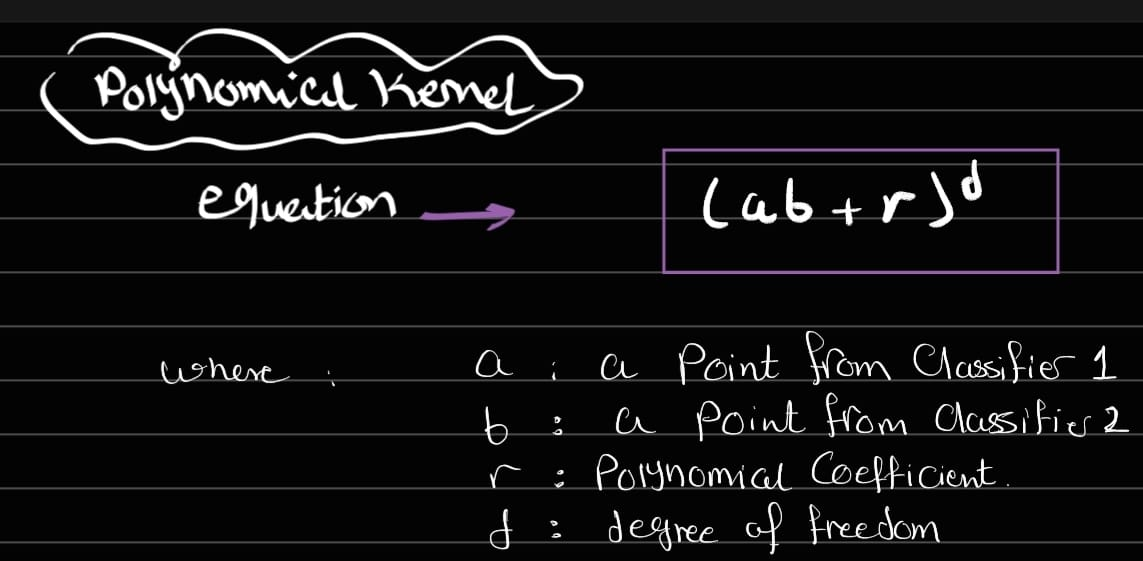

**let's make assumption for the parameters , and see how the points will look like:**
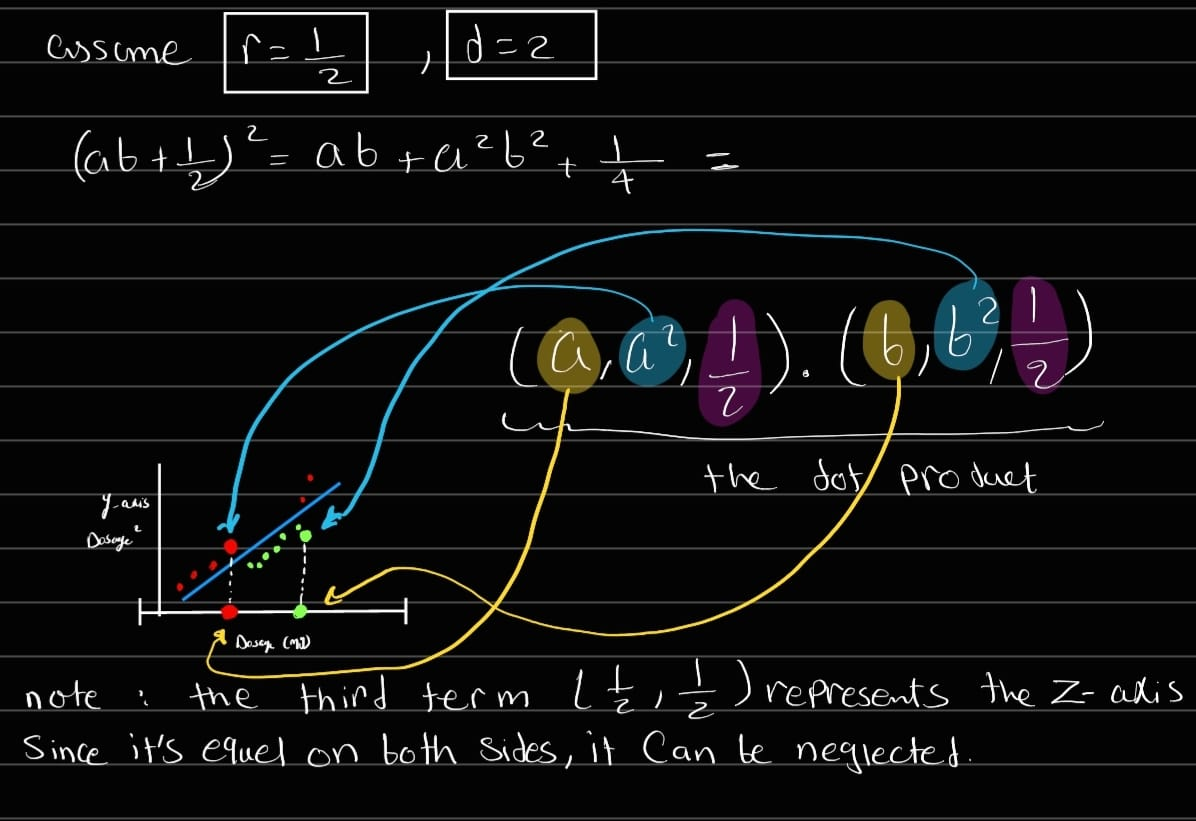

as you can see here, the points moved from a lower dimention to a higher dimention, and we can now draw the decision boundary(SVC)


## 2-radial kernal(radial basis function-->RBF)

One of the most powerful and commonly used kernels in SVMs. Usually the choice for non-linear data.

- the difference between polynomial kernel and radial kernel is that the later represents data in infinte dimention.
- the radial kernel uses the nearest neighbour to classify new observations.



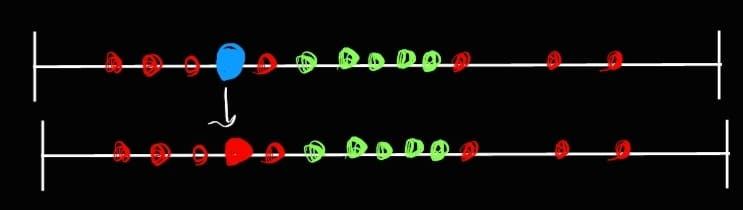

Here's the equation for an RBF kernel:

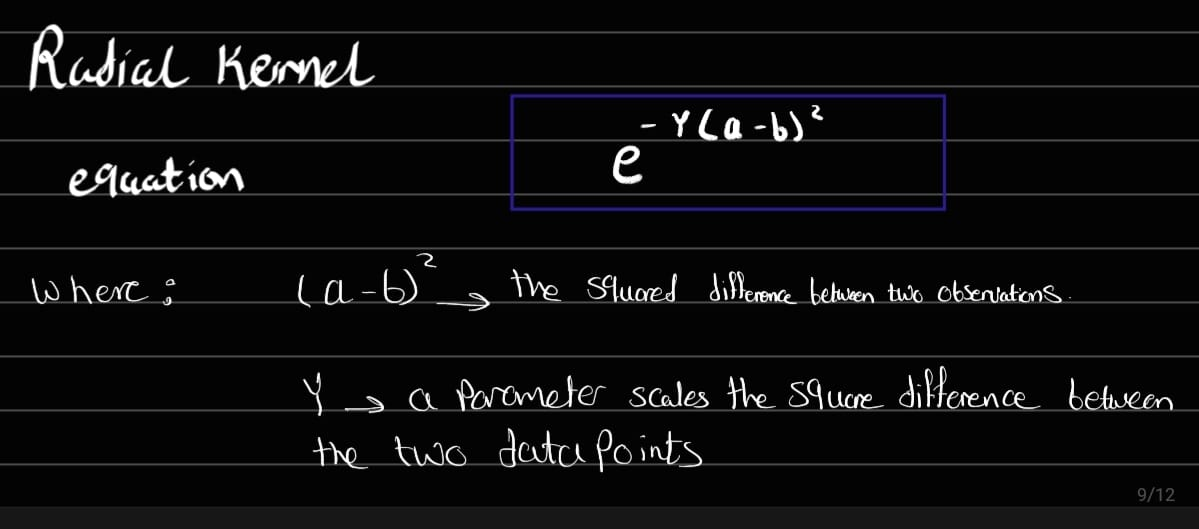

NOW, let's try different values for **gamma** parameter and note our observations:
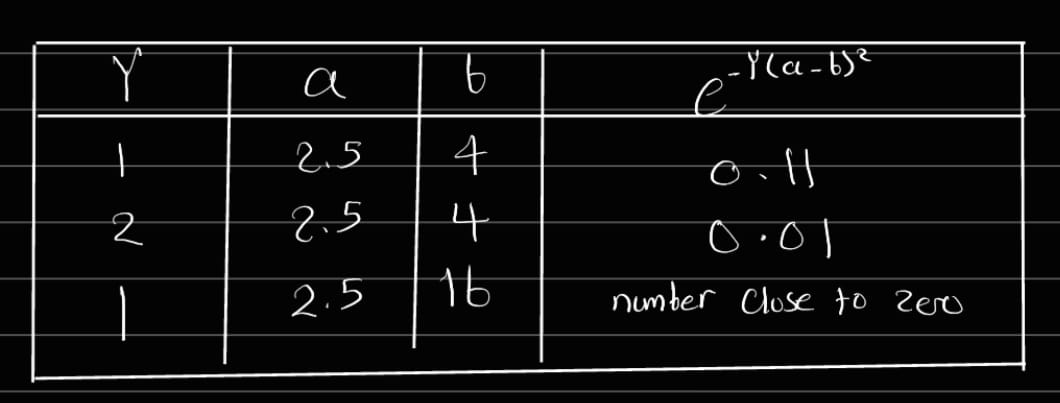

**observatins**

1- the more value of **gamma** , the less influence both points have on each other( observation of: raw1,raw2)

2-  at constant **gamma** , the high dimentional relatoinship between two points close to each other is **bigger than** that one of two points far of each other(small influence)(observation of raw3)

**Notes:**
- the radial kernel is equel to adding polynomial terms of **r** = 0 and **d** increases greadually from **0** to infintity.
- **r=0** means that we still in the same dimention , only the data points are shifted on the same axis according to the value of **d**.

# before we start the implementation,Take care!
### There are a few things you should watch out with SVMs in particular:

- **Make sure that your data are in numeric(categorical encoding required here)** form instead of categorical form. SVMs expect numbers instead of other kinds of labels.
- **Avoid copying data(check duplicates)** as much as possible. Some Python libraries will make duplicates of your data if they aren't in a specific format. Copying data will also slow down your training time and skew the way your model assigns the weights to a specific feature.
- **Watch your kernel cache size** because it uses your RAM. If you have a really large dataset, this could cause problems for your system.
- **Scale** your data because SVM algorithms aren't scale invariant. That means you can convert all of your data to be within the ranges of [0, 1] or [-1, 1].

### <font color='red'>disclaimer  </font>: 
this notebook does't contain the mathematics behind the SVM, only equations above to understand the idea.
but if you want to go deeper, check these tutorials:
https://bit.ly/3rxF4UG


https://bit.ly/38QZdhX

# <font color='blue'> python implementation for support vector machine  </font>
we  will work on **cardiovascular disease** dataset from kaggle which has binary output and the following features:

Age :Objective Feature --> **age**

Height : Objective Feature --> **height** 

Weight : Objective Feature --> **weight**

Gender : Objective Feature --> **gender**

Systolic blood pressure: Examination Feature --> **ap_hi**

Diastolic blood pressure: Examination Feature --> **ap_lo** 

Cholesterol :Examination Feature --> **cholesterol** | 1: normal, 2: above normal, 3: well above normal |

Glucose : Examination Feature --> **gluc** | 1: normal, 2: above normal, 3: well above normal |

Smoking : Subjective Feature --> **smoke** 

Alcohol intake : Subjective Feature --> **alco** 

Physical activity : Subjective Feature --> **active** 

Presence or absence of cardiovascular disease :Target Variable --> **cardio** 

### import the required libraries and the dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import svm

In [4]:
df=pd.read_csv('cardio_train.csv',sep=";")
df.head(10)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Time to clean our data

### 1- check and remove missing values

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

no missing values found

### 2- check and remove duplicates

In [7]:
df.duplicated().sum()

0

no dublicates cells were found

### 3- replace weight and height columns with bmi, then drop these columns

In [8]:
df['bmi']=round(df['weight']/(df['height']/100)**2,2)
# now we can drop weight, height columns , also id column can be dropped if we want to 
df.drop(['weight','height','id'],axis=1,inplace=True)


In [9]:
df.columns

Index(['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

### 4- convert gender to 0 for females and 1 for males

In [12]:
df['gender']=df["gender"]-3
df.head(3)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,1,110,80,1,1,0,0,1,0,21.97
1,20228,0,140,90,3,1,0,0,1,1,34.93
2,18857,0,130,70,3,1,0,0,0,1,23.51


Text(0, 0.5, 'bmi')

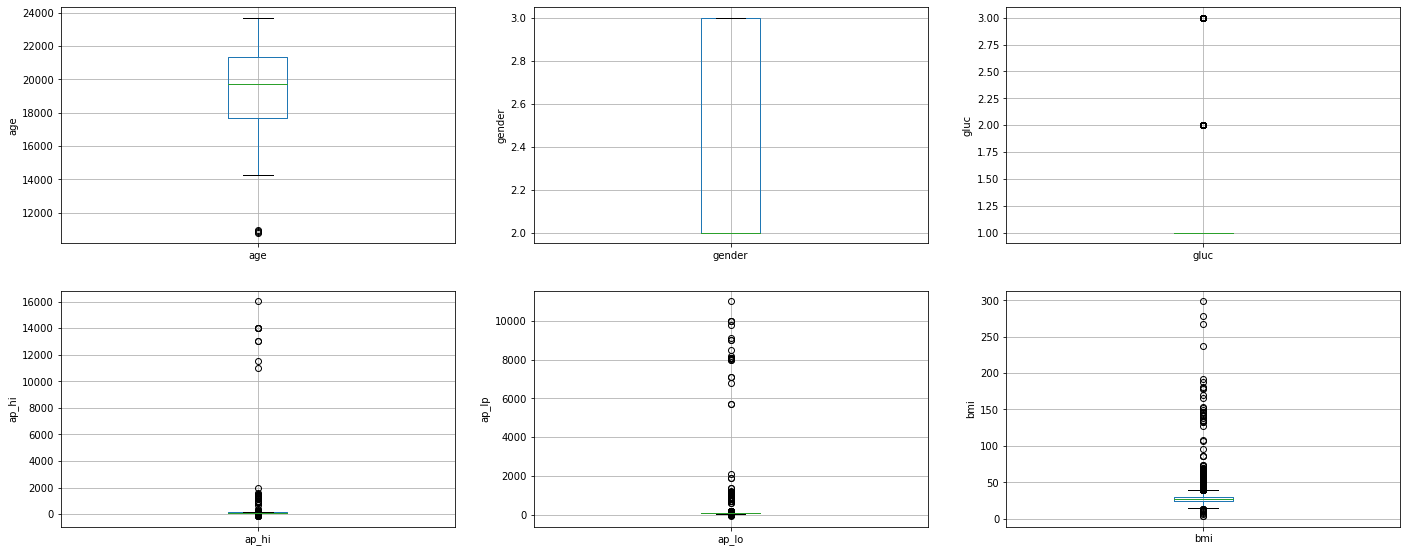

In [9]:
plt.figure(figsize=(24,20))


plt.subplot(4, 3, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(4, 3, 2)
fig = df.boxplot(column='gender')
fig.set_title('')
fig.set_ylabel('gender')


plt.subplot(4, 3, 3)
fig = df.boxplot(column='gluc')
fig.set_title('')
fig.set_ylabel('gluc')

plt.subplot(4, 3, 4)
fig = df.boxplot(column='ap_hi')
fig.set_title('')
fig.set_ylabel('ap_hi')


plt.subplot(4, 3, 5)
fig = df.boxplot(column='ap_lo')
fig.set_title('')
fig.set_ylabel('ap_lp')

plt.subplot(4, 3, 6)
fig = df.boxplot(column='bmi')
fig.set_title('')
fig.set_ylabel('bmi')



In [13]:
col=['age','ap_hi','ap_lo','cholesterol','bmi']
Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1
df2=df[~((df[col]<(Q1-1.5*IQR))|(df[col]>(Q3+1.5*IQR))).any(axis=1)]
df2

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,1,110,80,1,1,0,0,1,0,21.97
1,20228,0,140,90,3,1,0,0,1,1,34.93
2,18857,0,130,70,3,1,0,0,0,1,23.51
3,17623,1,150,100,1,1,0,0,1,1,28.71
5,21914,0,120,80,2,2,0,0,0,0,29.38
...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,0,130,90,1,1,0,0,1,1,23.66
69994,21074,0,150,80,1,1,0,0,1,1,29.38
69995,19240,1,120,80,1,1,1,0,1,0,26.93
69998,22431,0,135,80,1,2,0,0,0,1,27.10


Text(0, 0.5, 'bmi')

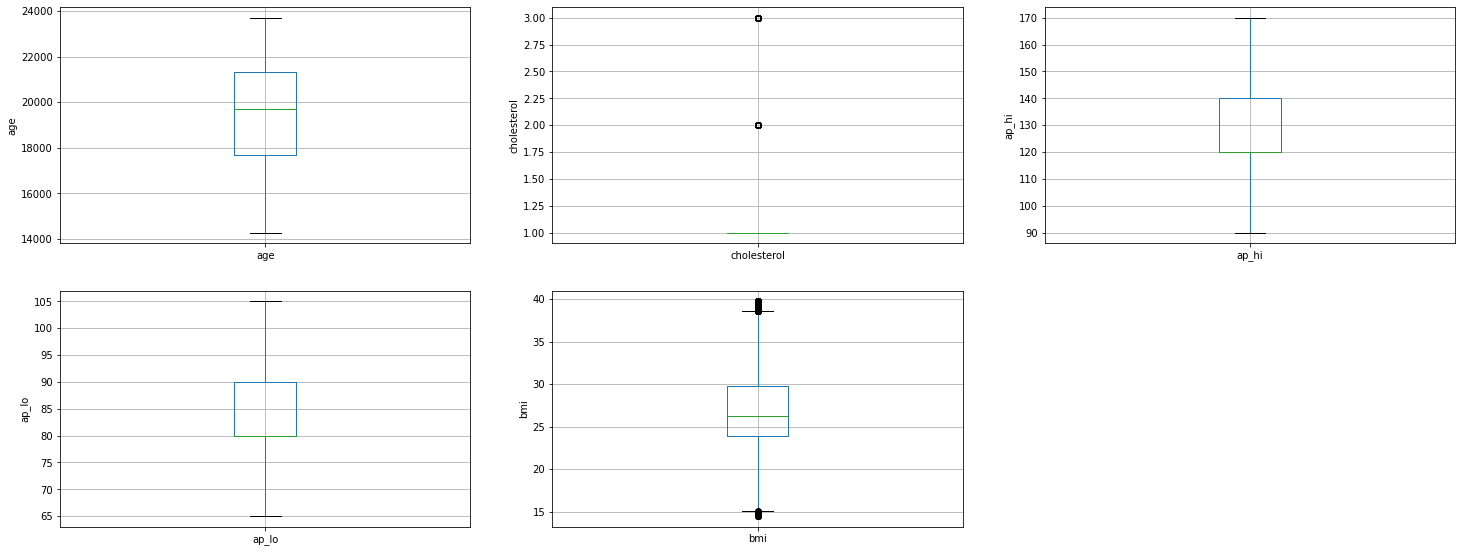

In [11]:
plt.figure(figsize=(25,20))
plt.subplot(4, 3, 1)
fig = df2.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')

plt.subplot(4, 3, 2)
fig = df2.boxplot(column='cholesterol')
fig.set_title('')
fig.set_ylabel('cholesterol')

plt.subplot(4, 3, 3)
fig = df2.boxplot(column='ap_hi')
fig.set_title('')
fig.set_ylabel('ap_hi')


plt.subplot(4, 3, 4)
fig = df2.boxplot(column='ap_lo')
fig.set_title('')
fig.set_ylabel('ap_lo')

plt.subplot(4, 3, 5)
fig = df2.boxplot(column='bmi')
fig.set_title('')
fig.set_ylabel('bmi')


## 6- declare feature vectors and target variable

In [14]:
X=df2.drop(['cardio'],axis=1)
y=df2['cardio']

## 7- train/test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape,X_test.shape

((50192, 10), (12548, 10))

## 7-feature scaling

In [16]:
cols=X_train.columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_copy=scaler.fit_transform(X_train)
X_train_copy=pd.DataFrame(X_train_copy,columns=[cols])
X_test_copy=scaler.transform(X_test)
X_test_copy = pd.DataFrame(X_test_copy, columns=[cols])

In [17]:
X_train_copy.head(4)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,-0.386026,-0.746368,-0.447822,-0.218591,-0.527729,-0.391357,-0.310827,-0.235010,0.495875,-0.346500
1,-0.159265,1.339822,-0.447822,-0.349357,-0.527729,-0.391357,-0.310827,-0.235010,0.495875,1.675677
2,-0.792000,1.339822,2.356535,2.396724,-0.527729,-0.391357,3.217222,4.255139,0.495875,-0.494022
3,0.948121,1.339822,-0.447822,-0.218591,-0.527729,-0.391357,-0.310827,-0.235010,0.495875,-0.042380


# NOW, it's time to Run SVM

## 1- run svm with default parameters and kernel= rbf
Default hyperparameter means **c**=1.0, **kernel**=rbf and **gamma**=auto among other parameters.

#### before moving to implementation, let's understand the important parameter **c** in RBF:
The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
#fit classifier to training data
svc.fit(X_train_copy,y_train)
#make prediction on test set
y_pred=svc.predict(X_test_copy)
#compute and print accuracy score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7292795664647752


## 2-run svm with rbf kernel and c=100.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(C=100.0)
#fit classifier to training data
svc.fit(X_train_copy,y_train)
#make prediction on test set
y_pred=svc.predict(X_test_copy)
#compute and print accuracy score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)    

We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

## 3-run svm with rbf kernel and c=1000.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(C=1000.0)
#fit classifier to training data
svc.fit(X_train_copy,y_train)
#make prediction on test set
y_pred=svc.predict(X_test_copy)
#compute and print accuracy score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)    

from the above examples of training our dataset with different values of **c** , we can see that at **c=100** the accruracy is bigger than that one when **c=1** and **c=1000**

let's try to find the accuracy of the training set

In [ ]:
y_predict_train=linera_svc.predict(X_train_copy)
y_predict_train
accuracy_train=accuracy_score(y_train,y_predict_train)

### let's check overfitting 

In [ ]:
linear_svc.score(X_train_copy, y_train)

In [ ]:
linear_svc.score(X_test_copy, y_test)

# run svm with polynomial kernel

## 4-Run SVM with polynomial kernel and C=1.0

In [ ]:
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train_copy,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test_copy)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## 5-Run SVM with polynomial kernel and C=100.0

In [ ]:
poly_svc=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc.fit(X_train_copy,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test_copy)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## 6-Run SVM with polynomial kernel and C=1000.0

In [ ]:
poly_svc=SVC(kernel='poly', C=1000.0) 


# fit classifier to training set
poly_svc.fit(X_train_copy,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test_copy)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# <font color='blue'>confusion matrix  </font>

**A confusion matrix** is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

## visualize the matrix

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')